In [6]:
import numpy as np
import matplotlib.pyplot as plt

def assign_learning_rate(optimizer, new_lr):
    if optimizer is not None:
        for param_group in optimizer.param_groups:
            param_group["lr"] = new_lr

def _warmup_lr(base_lr, warmup_length, step):
    return base_lr * (step + 1) / warmup_length

def cosine_lr(optimizer, base_lr, warmup_length, steps, start_step=0, booster=0., elongation=1.):
    """
        start_step first step when running a resumed training
        booster adjusts learning rate curvature after warmup, range from 0.0 (no boost) to 1.0 (max boost)
        elongation static lr in the end for a proportion of elongation, 1. = no elongation, 1.2 20%
    """
    booster = np.max([2, 1/(1e-11 + booster/2)])
    steps = np.floor(steps/elongation)
    
    def _lr_adjuster(step):
        if (step - start_step) < warmup_length:
            lr = _warmup_lr(base_lr, warmup_length, (step - start_step))
        elif step <= steps:
            e = (step - start_step) - warmup_length
            es = (steps - start_step) - warmup_length
            lr = 0.5 * ((1 + np.cos(np.pi * e / es)) * base_lr) + (1 + np.cos(np.pi * (1 - e / es))) * base_lr/booster
        else:
            lr = 2 * base_lr/booster
        return lr
    return _lr_adjuster

batches = 117
epochs = 45
total_steps = (batches * epochs)
start_step = 0
lr = 2e-2
warmup = 2500
booster = 0.
elongation = 1.

scheduler2 = cosine_lr(None, lr, warmup, total_steps, start_step, booster=booster, elongation=elongation)

batches = 117
epochs = 90
total_steps = (batches * epochs)
start_step = 0
lr = 2e-2
warmup = 2500
booster = 0.5
elongation = 2.5

scheduler = cosine_lr(None, lr, warmup, total_steps, start_step, booster=booster, elongation=elongation)



In [7]:
lr_ = []
lr2_ = []
for steps in range(start_step,int(total_steps * 1.)):
    lr_.append(scheduler(steps))
    lr2_.append(scheduler2(steps))
data = np.array(lr_)
data2 = np.array(lr2_)

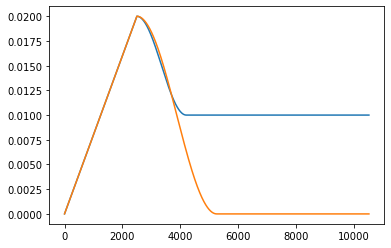

In [8]:
plt.plot(data)
plt.plot(data2)
plt.show();

In [4]:
lr_[1]

1.6e-05

In [5]:
np.cos(0), np.cos(np.pi)

(1.0, -1.0)